**
**Group Name : The Uncalled Four**

**Project Name:Fake News Detection**

**Section: C**

***Student Id:***

*   191-15-12126
*   191-15-12606
*   191-15-12804
*   191-15-12815





In [1]:
#Importing all Dependencies
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')
# printing the stopwords in English
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

Data Pre-processing

In [3]:
fake_news = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/Data Mining Project/Fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
true_news = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/Data Mining Project/True.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [6]:
# Create a column with fake=1 in fake_news dataset
fake_news['label']=1
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,1


In [7]:
# Create a column with fake=0 in true_news dataset
true_news['label'] = 0
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17,0


In [8]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    3000 non-null   object
 1   text     3000 non-null   object
 2   subject  3000 non-null   object
 3   date     3000 non-null   object
 4   label    3000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [9]:
true_news.describe()

,label
count,3000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [10]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2999 non-null   object
 1   text     2999 non-null   object
 2   subject  2999 non-null   object
 3   date     2999 non-null   object
 4   label    2999 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 117.3+ KB


In [11]:
fake_news.describe()

,label
count,2999.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [12]:
# Concat two fake and true news
news = pd.concat([fake_news, true_news])
news.sample(5)
news_dataset=news
news_dataset

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,1
...,...,...,...,...,...
2995,Trump brand to exit Toronto skyline after buyo...,TORONTO (Reuters) - The name Trump will be rem...,politicsNews,27-Jun-17,0
2996,Pence says Trump-Modi meetings 'historic and p...,WASHINGTON (Reuters) - U.S. Vice President Mik...,politicsNews,27-Jun-17,0
2997,NAFTA hearings start with Democratic lawmakers...,WASHINGTON (Reuters) - Two Democratic congress...,politicsNews,27-Jun-17,0
2998,Supreme Court's recent unity faces looming test,WASHINGTON (Reuters) - As the U.S. Supreme Cou...,politicsNews,27-Jun-17,0


In [13]:
#number of row and column
news_dataset.shape

(5999, 5)

In [14]:
news_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5999 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    5999 non-null   object
 1   text     5999 non-null   object
 2   subject  5999 non-null   object
 3   date     5999 non-null   object
 4   label    5999 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 281.2+ KB


In [15]:
news_dataset.describe()

,label
count,5999.000000
mean,0.499917
std,0.500042
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [16]:
# print the first 5 rows of the dataframe
news_dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,1


In [17]:
# print the last 5 rows of the dataframe
news_dataset.tail()

,title,text,subject,date,label
2995,Trump brand to exit Toronto skyline after buyo...,TORONTO (Reuters) - The name Trump will be rem...,politicsNews,27-Jun-17,0
2996,Pence says Trump-Modi meetings 'historic and p...,WASHINGTON (Reuters) - U.S. Vice President Mik...,politicsNews,27-Jun-17,0
2997,NAFTA hearings start with Democratic lawmakers...,WASHINGTON (Reuters) - Two Democratic congress...,politicsNews,27-Jun-17,0
2998,Supreme Court's recent unity faces looming test,WASHINGTON (Reuters) - As the U.S. Supreme Cou...,politicsNews,27-Jun-17,0
2999,Senate postpones planned healthcare vote until...,WASHINGTON (Reuters) - U.S. Senate Republican ...,politicsNews,27-Jun-17,0


In [18]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [19]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [20]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [21]:
# merging the author name and news title
news_dataset['content'] = news_dataset['title']+' '+news_dataset['text']

In [22]:
print(news_dataset['content'])

0        Donald Trump Sends Out Embarrassing New Year’...
1        Drunk Bragging Trump Staffer Started Russian ...
2        Sheriff David Clarke Becomes An Internet Joke...
3        Trump Is So Obsessed He Even Has Obama’s Name...
4        Pope Francis Just Called Out Donald Trump Dur...
                              ...                        
2995    Trump brand to exit Toronto skyline after buyo...
2996    Pence says Trump-Modi meetings 'historic and p...
2997    NAFTA hearings start with Democratic lawmakers...
2998    Supreme Court's recent unity faces looming tes...
2999    Senate postpones planned healthcare vote until...
Name: content, Length: 5999, dtype: object


In [23]:
# separating the data & fake
X = news_dataset.drop(columns='label', axis=1) # store data
Y = news_dataset['label'] #store true or false

In [24]:
print(X)
print(Y)

                                                  title  ...                                            content
0      Donald Trump Sends Out Embarrassing New Year’...  ...   Donald Trump Sends Out Embarrassing New Year’...
1      Drunk Bragging Trump Staffer Started Russian ...  ...   Drunk Bragging Trump Staffer Started Russian ...
2      Sheriff David Clarke Becomes An Internet Joke...  ...   Sheriff David Clarke Becomes An Internet Joke...
3      Trump Is So Obsessed He Even Has Obama’s Name...  ...   Trump Is So Obsessed He Even Has Obama’s Name...
4      Pope Francis Just Called Out Donald Trump Dur...  ...   Pope Francis Just Called Out Donald Trump Dur...
...                                                 ...  ...                                                ...
2995  Trump brand to exit Toronto skyline after buyo...  ...  Trump brand to exit Toronto skyline after buyo...
2996  Pence says Trump-Modi meetings 'historic and p...  ...  Pence says Trump-Modi meetings 'historic a

**Data Analysis and Data 
Visualizations**

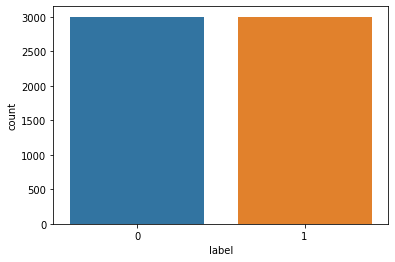

In [25]:
# Explore the target variable
sns.countplot(x='label', data=news_dataset)

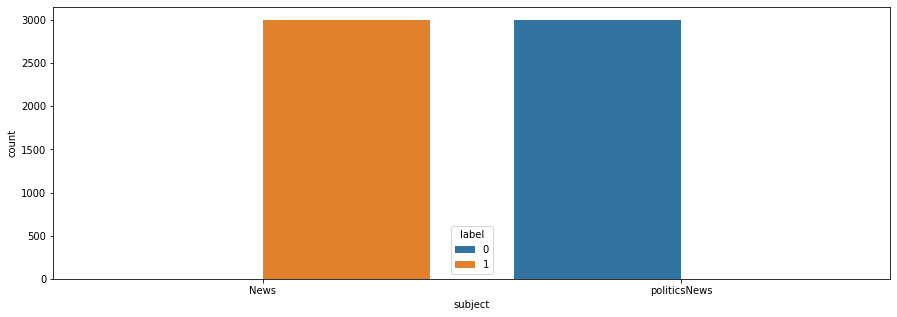

In [26]:
# Explore the subject column
plt.figure(figsize=(15,5))
sns.countplot(x='subject', data=news_dataset, hue='label')

In [27]:
news_dataset['date'] = pd.to_datetime(news_dataset['date'], errors='coerce')
news_dataset['Year'] = news_dataset['date'].dt.year
news_dataset['Month'] = news_dataset['date'].dt.month
news_dataset.head(2)

,title,text,subject,date,label,content,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,Donald Trump Sends Out Embarrassing New Year’...,2017,12
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,Drunk Bragging Trump Staffer Started Russian ...,2017,12


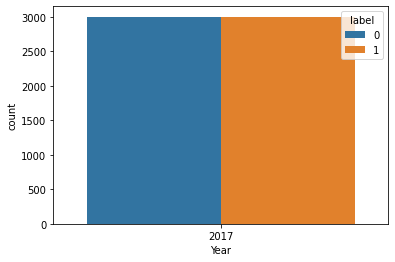

In [28]:
# check the impact of year on tha target
sns.countplot(x='Year', data=news_dataset, hue='label')

**Do Stemming** 

In [29]:
port_stem = PorterStemmer()

In [30]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [31]:
#apply stemming into text
news_dataset['lcontent'] = news_dataset['content'].apply(stemming)

In [32]:
#print text data
print(news_dataset['content'])

0        Donald Trump Sends Out Embarrassing New Year’...
1        Drunk Bragging Trump Staffer Started Russian ...
2        Sheriff David Clarke Becomes An Internet Joke...
3        Trump Is So Obsessed He Even Has Obama’s Name...
4        Pope Francis Just Called Out Donald Trump Dur...
                              ...                        
2995    Trump brand to exit Toronto skyline after buyo...
2996    Pence says Trump-Modi meetings 'historic and p...
2997    NAFTA hearings start with Democratic lawmakers...
2998    Supreme Court's recent unity faces looming tes...
2999    Senate postpones planned healthcare vote until...
Name: content, Length: 5999, dtype: object


In [33]:
#print lcontent data
print(news_dataset['lcontent'])

0       donald trump send embarrass new year eve messa...
1       drunk brag trump staffer start russian collus ...
2       sheriff david clark becom internet joke threat...
3       trump obsess even obama name code websit imag ...
4       pope franci call donald trump christma speech ...
                              ...                        
2995    trump brand exit toronto skylin buyout deal to...
2996    penc say trump modi meet histor product washin...
2997    nafta hear start democrat lawmak urg strong la...
2998    suprem court recent uniti face loom test washi...
2999    senat postpon plan healthcar vote juli recess ...
Name: lcontent, Length: 5999, dtype: object


In [34]:
#separating the data and label
X = news_dataset['text'].values
Y = news_dataset['label'].values

In [35]:
print(X)

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [36]:
print(Y)

[1 1 1 ... 0 0 0]


In [37]:
Y.shape

(5999,)

In [38]:
# converting the textual data to numerical data
makevectorizer = TfidfVectorizer()
makevectorizer.fit(X)
X = makevectorizer.transform(X)

In [39]:
print(X)

  (0, 46099)	0.03467076265454842
  (0, 46083)	0.09258994803971154
  (0, 45984)	0.05192879149882217
  (0, 45976)	0.22653638325636113
  (0, 45955)	0.05887709015175601
  (0, 45693)	0.025539072462824705
  (0, 45622)	0.020988362364994823
  (0, 45566)	0.018427376883884888
  (0, 45556)	0.027923390240564235
  (0, 45519)	0.0334559999365284
  (0, 45518)	0.021513460331453432
  (0, 45409)	0.16672793489732146
  (0, 45292)	0.022297134356258415
  (0, 45213)	0.019847333335419024
  (0, 45186)	0.029846385884941408
  (0, 45099)	0.012215931615076088
  (0, 45078)	0.02461306909413992
  (0, 45015)	0.012546298203639951
  (0, 45012)	0.021474675780502713
  (0, 45010)	0.06165268327535794
  (0, 45008)	0.046611681458164196
  (0, 44998)	0.06165268327535794
  (0, 44699)	0.03648801103947255
  (0, 44478)	0.02577054032465232
  (0, 44143)	0.04951872746362623
  :	:
  (5998, 31914)	0.1740211647471848
  (5998, 30248)	0.08486889000489874
  (5998, 29946)	0.08801456168607841
  (5998, 29764)	0.11821273368421012
  (5998, 29595)

In [40]:
#Splitting the dataset to training & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [41]:
#Make and apply the Model: Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9949989581162743


In [43]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9875


In [44]:
#Making a Predictive System
X_new = X_test[24]
prediction = model.predict(X_new)
print("System predict : ",prediction[0])
if (prediction[0]==0):
  print('This news is Real')
else:
  print('This news is Fake')

System predict :  0
This news is Real


In [45]:
#Making a another Predictive System
X_new = X_test[3]
prediction = model.predict(X_new)
print("System predict : ",prediction[0])
if (prediction[0]==0):
  print('This news is Real')
else:
  print('This news is Fake')

System predict :  0
This news is Real
